In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import numpy as np
from src.gameSimulation.GameUr import GameUr, Player, Dice, GameSettings
import src.gameSimulation.Strategies as Strategies
import src.gameSimulation.Multirun as Multirun
import gameBoardDisplay as gbd

from scipy import stats


# %config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap

mplstyle.use('fast')
mplstyle.use('default')
# mpl.rcParams['figure.figsize'] = [20, 10]

colors = ["lightgreen", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)






In [2]:
rs = Strategies.RandomStrategy()
mfs = Strategies.MoveFirstStrategy()
mls = Strategies.MoveLastStrategy()
p0 = Player(0,7,mls)
p1 = Player(1, 7, mfs)
p2 = Player(2, 7, mfs)
# p3 = Player(3, 4, rs)
md2 = Dice.MultiD2Dice(4)
d4 = Dice.D4()
# gs = GameSettings([p0,p1],d,4,8,2,[8],[4,8,13],exactFinish=False)
gs0 = GameSettings([p0, p1], md2, 4, 8, 2, [8], [4, 8, 13])
gs1 = GameSettings([p1, p2], md2, 4, 8, 2, [8], [4, 8, 13])
# gs = [gs0,gs1]
gs = [gs1]

In [3]:
g = GameUr(gs0)
g.getStonesHistory()
g.run(500)

In [4]:
h=[Multirun.multirun(100,gs_) for gs_ in gs]

10
11
110
start pool
finish pool


In [5]:

gl = [[x["gameLength"] for x in h_] for h_ in h]


In [6]:
gl = [[x["gameLength"] for x in h_] for h_ in h]
gl_stacked = [[(i,gl_.count(i)) for i in range(np.min(gl_),np.max(gl_)+1)] for gl_ in gl]

gl_stacked
# np.average(gl)
# np.min(gl)
# np.max(gl)


[[(38, 1),
  (39, 1),
  (40, 2),
  (41, 5),
  (42, 3),
  (43, 11),
  (44, 13),
  (45, 7),
  (46, 6),
  (47, 8),
  (48, 10),
  (49, 9),
  (50, 4),
  (51, 8),
  (52, 6),
  (53, 3),
  (54, 2),
  (55, 3),
  (56, 2),
  (57, 3),
  (58, 0),
  (59, 2),
  (60, 0),
  (61, 1)]]

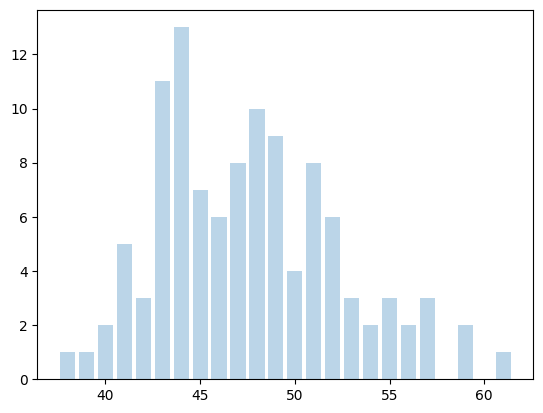

In [7]:
for gl_stacked_ in gl_stacked:
        plt.bar([x for x, _ in gl_stacked_], [
                y for _, y in gl_stacked_], alpha=0.3)


In [8]:
[{"min":np.min(gl_),"median":np.median(gl_),"avg":np.average(gl_),"modus":stats.mode(gl_),"max":np.max(gl_)} for gl_ in gl]

[{'min': 38,
  'median': 47.0,
  'avg': 47.59090909090909,
  'modus': ModeResult(mode=array([44]), count=array([13])),
  'max': 61}]

In [9]:

interestingGames= [{"min": gl_.index(np.min(gl_)), "median": gl_.index(
    np.median(gl_)), "max": gl_.index(np.max(gl_))} for gl_ in gl]
interestingGames


[{'min': 34, 'median': 3, 'max': 103}]

In [30]:

def drawGame(currGame):
    stepWidth = 0.2
    stepLineOcc = 0.1

    roundsLabels = [currGame["history"]["roundID"][i] if nR else ""  for i,nR in enumerate(currGame["history"]["newRound"])]

    graphcount = len(currGame["history"]["stones"])+1
    stepcount = np.max(currGame["history"]["globalStepID"])
    height_ratios = [3]*len(currGame["history"]["stones"])+[1]

    fig, ax = plt.subplots(nrows=graphcount, sharex=True, figsize=[
        stepWidth*stepcount, 4*graphcount], gridspec_kw={'height_ratios': height_ratios})
    fig.subplots_adjust(hspace=0)


    # for i,p in enumerate(currGame["history"]["stones"]):
        # ax[i].set_title(p)
        # ax[i].set_yticklabels()

    # ax[-1].set_title("DiceRolls/MoveDist")

    for a in ax[:-1]:
        
        gbd.makeGameboardDisplay( a,
            *list(currGame["gameSettings"].getFieldsSettings().values()), xoff=2)
        a.set_yticks(range(0, 16), ["start"]+list(range(1, 15))+["end"])
        for drf in currGame["gameSettings"].getDoubleRollFields():
            a.axhline(drf, color=(0, 0, 0, 0.3),  ls='--')

    for a in ax:
        for i, ap in enumerate(currGame["history"]["activePlayer"]):
            if ap == "p0":
                facecolor = '#ff0000'
            elif ap == "p1":
                facecolor = '#0000ff'
            else:
                continue
            a.axvspan(i-0.5, i+0.5, facecolor=facecolor, alpha=stepLineOcc)

    ax[0].set_xlabel('step')
    secax = ax[0].secondary_xaxis('top')
    secax.set_xlabel('round')
    secax.set_xticks(currGame["history"]["globalStepID"], roundsLabels,
                        color=(0.1, 0.1, 0.1, 0.8))



    # norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
    for i, p in enumerate(currGame["history"]["stones"]):
        playerStones = currGame["history"]["stones"][p]
        for s in playerStones:
            ax[i].plot(currGame["history"]["globalStepID"],
                    playerStones[s], marker='.', label=s)
        
    ax[-1].bar(currGame["history"]["globalStepID"],
            currGame["history"]["diceRoll"],alpha=0.5, label="diceRoll")
    ax[-1].bar(currGame["history"]["globalStepID"],
               currGame["history"]["moveDist"], alpha=0.5, label="moveDist")


    for a in ax[:-1]:
        a.axis('equal')
    for a in ax:
        # a.grid("y")
        a.legend(loc="lower right")
        a.set_xbound(-4, step_count)

    ax[-1].set_ybound(0,5)
    ax[-1].set_ylim(0,5)

    divider = make_axes_locatable(ax[-1])
    # axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=ax[-1])
    # axHisty.hist(currGame["history"]["diceRoll"],orientation='horizontal')
    # axHisty.hist(currGame["history"]["moveDist"],orientation='horizontal')
    # currGame["history"]["roundID"]
    # fig.tight_layout()



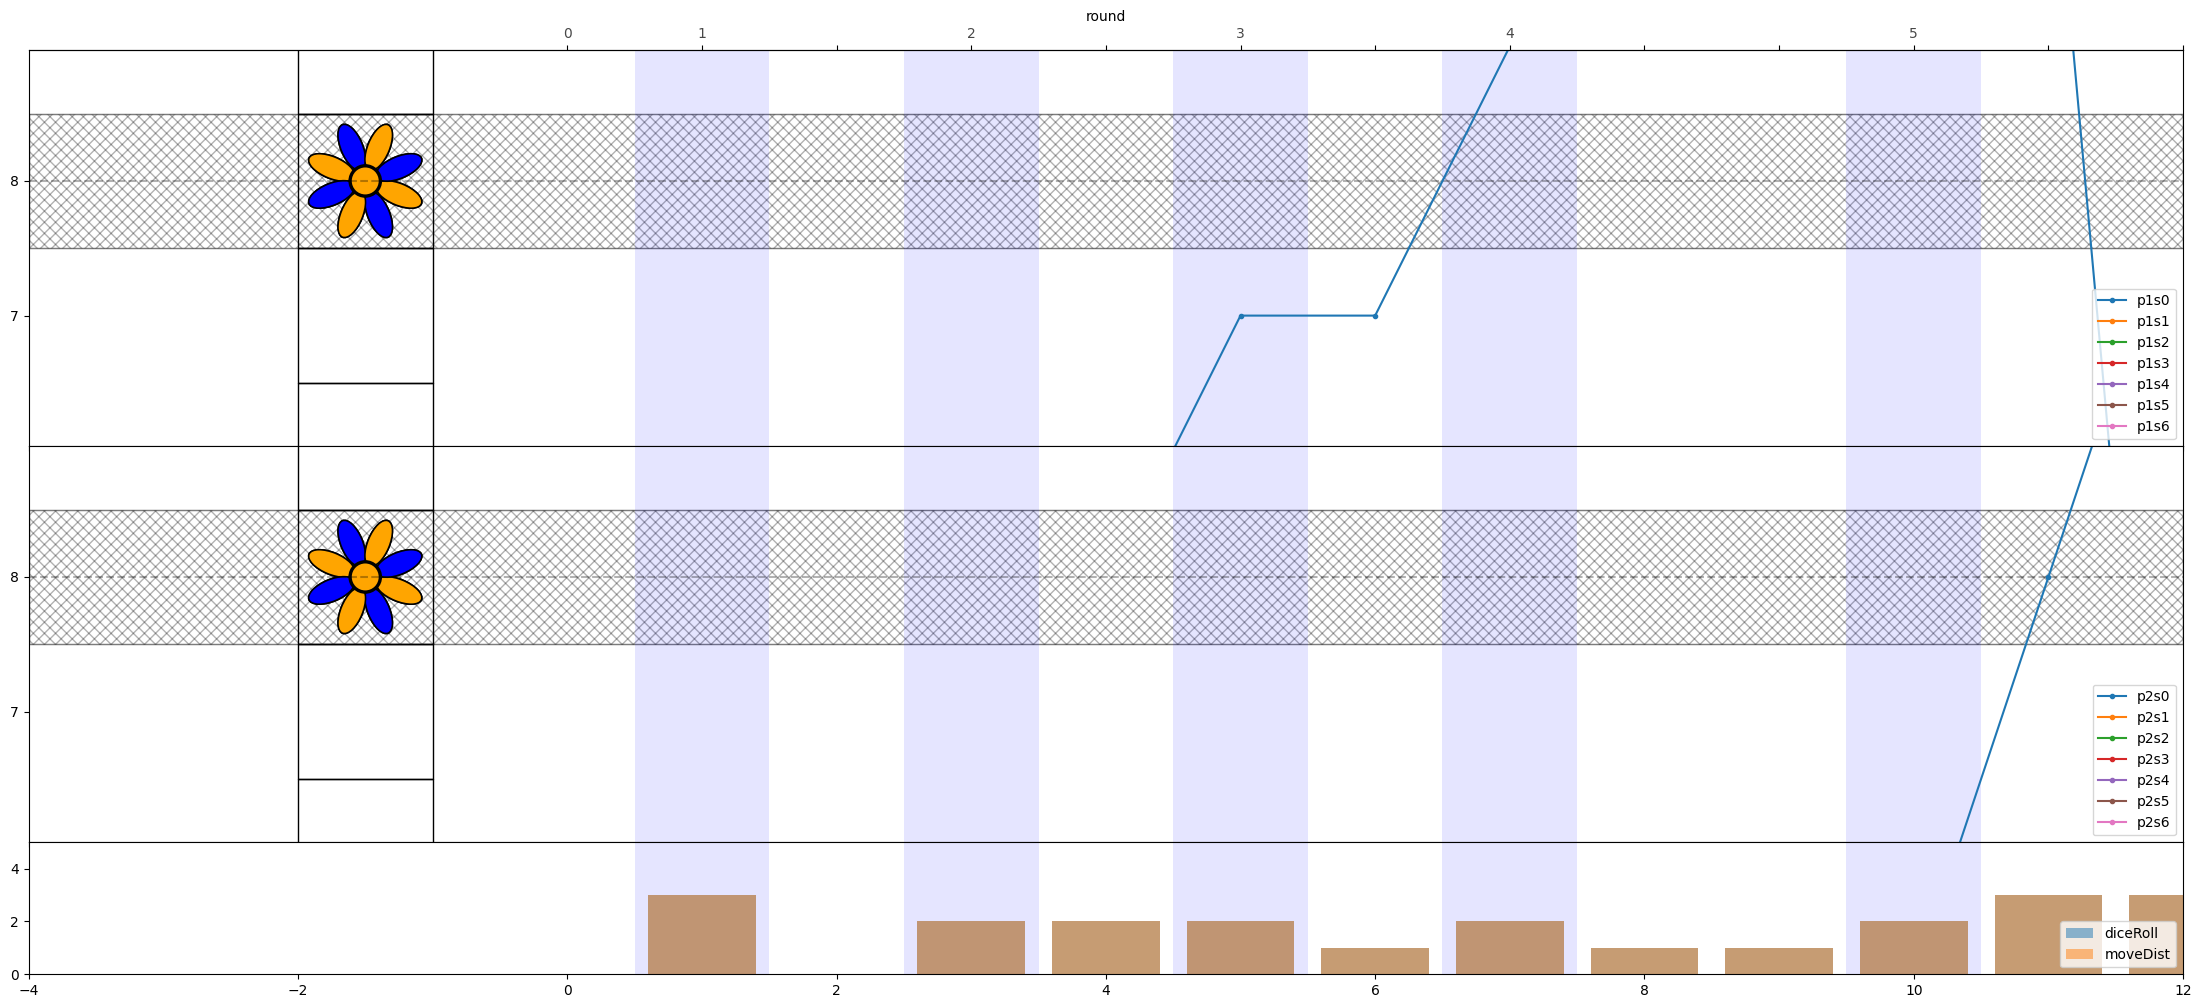

In [31]:

historyID = 0
currGame = h[historyID][interestingGames[historyID]["max"]]
drawGame(currGame)

In [32]:
currGame["history"]["activePlayer"]
currGame["history"]["newRound"]
currGame["history"]["roundID"]



[0,
 1,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 21,
 21,
 21,
 22,
 22,
 22,
 23,
 23,
 24,
 24,
 25,
 25,
 26,
 26,
 27,
 27,
 28,
 28,
 29,
 29,
 29,
 30,
 30,
 30,
 31,
 31,
 31,
 32,
 32,
 32,
 33,
 33,
 34,
 34,
 35,
 35,
 35,
 36,
 36,
 37,
 37,
 38,
 38,
 39,
 39,
 40,
 40,
 41,
 41,
 42,
 42,
 43,
 43,
 44,
 44,
 45,
 45,
 46,
 46,
 47,
 47,
 48,
 48,
 48,
 49,
 49,
 50,
 50,
 50,
 51,
 51,
 51,
 52,
 52,
 52,
 53,
 53,
 54,
 54,
 54,
 55,
 55,
 56,
 56,
 57,
 57,
 58,
 58,
 59,
 59,
 60]

In [33]:
game_length = 14

current_pos = -1

step_count = 0



while current_pos <= game_length:
       step_count += 1
       for i in range(current_pos):
              print(" ", end='')
       print("┠", end='')
       move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
       for i in range(move_dist-1):
              print("─", end='')
       print("┨ "+ str(move_dist) )

       current_pos+= move_dist

       print("┠╂", end='')
       for i in range(game_length-1):
              print("┬", end='')
       print("╂┨ "+str(current_pos))
       for i in range(current_pos):
              print(" ", end='')
       print("┃")

 


┠──┨ 3
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 2
  ┃
  ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 4
    ┃
    ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 6
      ┃
      ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 7
       ┃
       ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 8
        ┃
        ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 10
          ┃
          ┠──┨ 3
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 13
             ┃
             ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 15
               ┃
